In [1]:
import pandas as pd

In [2]:
Iphone11 = [87, 85, 78, 82]
Galaxy_S20 = [71, 82, 75, 80]
Google_Pixel_4 = [66, 74, 79]
Huawei = [65, 69, 67, 63]

In [3]:
all_scores = Iphone11  + Galaxy_S20 + Google_Pixel_4 + Huawei
company_names = (['Iphone11'] * len(Iphone11)) +  (['Galaxy_S20'] * len(Galaxy_S20)) +  (['Google_Pixel_4'] * len(Google_Pixel_4)) + (['Huawei'] * len(Huawei))

In [4]:
data = pd.DataFrame({'phone': company_names, 'score': all_scores})

In [5]:
data

,phone,score
0,Iphone11,87
1,Iphone11,85
2,Iphone11,78
3,Iphone11,82
4,Galaxy_S20,71
5,Galaxy_S20,82
6,Galaxy_S20,75
7,Galaxy_S20,80
8,Google_Pixel_4,66
9,Google_Pixel_4,74


In [9]:
data.groupby('phone').mean()

,score
phone,
Galaxy_S20,77
Google_Pixel_4,73
Huawei,66
Iphone11,83


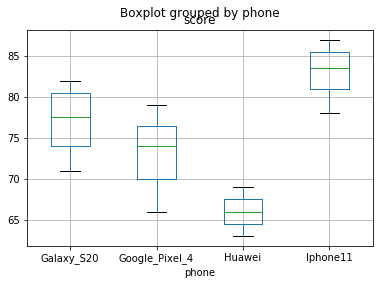

In [10]:
data.boxplot('score', by='phone')

In [11]:
# A 1-Way ANOVA Using StatsModels

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
lm = ols('score ~ phone',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df      sum_sq     mean_sq        F    PR(>F)
phone      3.0  607.733333  202.577778  9.85998  0.001887
Residual  11.0  226.000000   20.545455      NaN       NaN


In [14]:
# compute Overall Mean
overall_mean = data['score'].mean()
overall_mean

74.86666666666666

In [15]:
#compute SST(Sum Of Squres Total)
data['overall_mean'] = overall_mean
ss_total = sum((data['score']-data['overall_mean']))
ss_total

9.947598300641403e-14

In [16]:
# compute group means
group_means = data.groupby('phone').mean()
group_means = group_means.rename(columns = {'score': 'group_mean'})
group_means

,group_mean,overall_mean
phone,,
Galaxy_S20,77,74.866667
Google_Pixel_4,73,74.866667
Huawei,66,74.866667
Iphone11,83,74.866667


In [17]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'phone', right_index = True)

In [18]:
#compute Sum of Squres Residual(SSW: Sum Of Squres Within)
ss_residual = sum((data['score']-data['group_mean'])**2)
ss_residual

226

In [19]:
# compute Sum of Squares Model(SSB: Sum of Squre Between)
ss_explained = sum((data['overall_mean_x'] - data['group_mean'])**2)
ss_explained

607.7333333333332

In [20]:
# compute MSW(Mean Squre Residual(Within))
n_groups = len(set(data['phone']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

20.545454545454547

In [21]:
# compute MSB(Mean Square Explained(Between))
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

202.57777777777775

In [22]:
#compute F-Value
f = ms_explained / ms_residual
f

9.859980334316615

In [23]:
# compute p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.0018872323832755944

In [24]:
# Check the hypothesis
print("Check the hypothesis and result: ")
alpha = 0.05
if(p_value < alpha):
    print("We can reject the null hypothesis and conclude that the average score in these population are not equal")
else:
    print("We cannot reject the null hypothsis and conclude that the average score in these population are equal")


Check the hypothesis and result: 
We can reject the null hypothesis and conclude that the average score in these population are not equal
